<a href="https://colab.research.google.com/github/Dealer2112/trabajofinal2/blob/main/Copia_de_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset de Excel
df = pd.read_excel('/content/Copia de sla_mexico Revisión (1).xlsx')


In [ ]:
# 1.Abstracto con Motivación y Audiencia
# Motivación: Optimizar el flujo de trabajo en la gestión de cuentas es crucial para mejorar la eficiencia y reducir los tiempos de ciclo.
# Utilizando un dataset que incluye información sobre tiempos de ciclo, reasignaciones y participación de agentes,
# se busca identificar patrones y factores que afectan el flujo de trabajo para implementar mejoras efectivas.
#
# Objetivo: Aplicar técnicas de Machine Learning para analizar y mejorar el flujo de trabajo en la gestión de cuentas,
# enfocándose en los tiempos de ciclo, la frecuencia de reasignaciones y la participación de agentes.
# El objetivo es optimizar los procesos para aumentar la eficiencia y eficacia en la gestión de cuentas.

## Poibles Problemas Identificados:

#Sobrecarga de Trabajo: ¿Los gestores con alto volumen de cuentas están experimentando demoras significativas debido a su carga de trabajo?
#Condiciones Locales: ¿Existen problemas específicos en regiones con pocos cuentas asignadas pero altas demoras?

In [ ]:
#2.1 Resumen de información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   fec_activacion                  1036 non-null   datetime64[ns]
 1   id_externo_cliente              1036 non-null   object        
 2   id_cuenta                       1036 non-null   int64         
 3   id_cliente                      1036 non-null   int64         
 4   id_acreditado                   1036 non-null   int64         
 5   id_acreditado_cuenta_domicilio  1036 non-null   int64         
 6   id_estado                       1036 non-null   int64         
 7   id_municipio                    1036 non-null   int64         
 8   fec_asignacion                  1036 non-null   datetime64[ns]
 9   fec_apartado                    1036 non-null   datetime64[ns]
 10  id_agente_apartado              1036 non-null   int64         
 11  id_a

In [ ]:
#2.3 Dimensiones del DataFrame
df.shape

(1036, 15)

In [ ]:
#2.4 # Crear una nueva columna 'nuevo_id' que contenga un índice único para cada fila
df['nuevo_id'] = range(1, len(df) + 1)

# Verificar las primeras filas para asegurarnos de que se creó correctamente
print(df[['nuevo_id', 'id_externo_cliente', 'fec_asignacion']].head(10))



   nuevo_id id_externo_cliente      fec_asignacion
0         1              61858 2024-04-29 22:20:28
1         2              45091 2024-05-21 19:24:29
2         3              33846 2023-02-24 19:12:07
3         4              53345 2024-01-22 08:23:09
4         5              54816 2023-10-17 18:00:41
5         6              43450 2023-04-26 15:21:52
6         7              55101 2024-02-22 17:32:52
7         8              54521 2023-04-18 17:30:10
8         9              41252 2023-05-15 17:17:05
9        10              41153 2023-04-21 14:45:09


In [ ]:
#2.4 Descripción de las variables en el conjunto de datos:
# id_cuenta: Identificador único de la cuenta.
# id_domicilio: Identificador único del domicilio.
# fec_activacion: Momento en que la cuenta se carga en el sistema.
# fec_asignacion: Momento en que la cuenta se asigna a un agente o recurso.
# fec_apartado: Momento en que el agente aparta el domicilio para la visita.
# fec_visita: Momento en que se realiza la visita.
# id_externo_cliente: Identificador externo del cliente.
# id_cliente: Identificador del cliente asociado a la cuenta.
# id_acreditado: Identificador del acreditado.
# id_acreditado_cuenta_domicilio: Identificador único que relaciona al acreditado, cuenta y domicilio.
# id_estado: Identificador del estado (ubicación geográfica).
# id_municipio: Identificador del municipio (ubicación geográfica).
# id_agente_asignado: Identificador del agente asignado.
# id_agente_apartado: Identificador del agente que aparta el domicilio para visita.
# id_agente: Identificador del agente responsable de la visita.
# id_visita: Identificador de la visita.
# fec_finalizada: Fecha en que se finalizó la gestión de la cuenta.
##Opiones de columnas.
## fec_finalizada ajustada:Fecha en que se finalizó la gestión de la cuenta (se ajustaron datos).



In [ ]:
#2.5 Identificación de Celdas Vacías
# Mostrar el número de valores nulos en cada columna
print("Número de valores nulos por columna:")
print(df.isnull().sum())

Número de valores nulos por columna:
fec_activacion                    0
id_externo_cliente                0
id_cuenta                         0
id_cliente                        0
id_acreditado                     0
id_acreditado_cuenta_domicilio    0
id_estado                         0
id_municipio                      0
fec_asignacion                    0
fec_apartado                      0
id_agente_apartado                0
id_agente                         0
id_visita                         0
fec_finalizada                    0
fec_finalizada ajustada           0
nuevo_id                          0
dtype: int64


In [ ]:
# Resumen de manejo de celdas vacías en el dataset

# 1. id_agente
# Celdas vacías: 487
# Manejo: Se asignó el valor "Sin agente asignado" a las celdas vacías donde
#         id_visita tenía la etiqueta "Sin visita y sin finalización".

# 2. id_agente_apartado
# Celdas vacías: 453
# Manejo: Se asignó el valor "Sin agente apartado" a las celdas vacías en
#         cuentas que tenían etiquetas similares.

# 3. fec_apartado
# Celdas vacías: 487
# Manejo: Se decidieron mantener las celdas vacías, ya que no hubo apartado ni asignación.

# 4. fec_finalizada
# Celdas vacías: 487
# Manejo: Se mantendrán las celdas vacías, reflejando la ausencia de finalización
#         en cuentas sin asignación ni visita.

# 5. fec_asignacion
# Celdas vacías: 933 (415 con etiqueta "Sin visita y sin finalización")
# Manejo:
#   - Las 415 celdas con la etiqueta se mantendrán vacías.
#   - Para las 530 celdas vacías que tienen fecha en fec_apartado,
#     se imputará fec_asignacion con los valores de fec_apartado.


In [ ]:
#Si el tiempo de demora comienza a contar desde que el gestor aparta la cuenta, entonces debemos ajustar el análisis para que refleje ese criterio. Aquí está el plan actualizado:

#Paso 1: Definir el Criterio de Demora
#Establecer el umbral de 3 días: Las cuentas que excedan este plazo desde la fecha de apartado hasta la fecha de finalización se considerarán demoradas.
#Paso 2: Calcular el Tiempo de Demora
#Agregar una columna de demora al dataset:

#Calcula la diferencia en días entre la fecha de apartado (fec_apartado) y la fecha de finalización (fec_finalizada).

In [ ]:
#1 Verificar la Estructura del DataFrame: Primero, asegúrate de que la columna fec_finalizada ajustada esté en el formato de fecha correcto. Si es un objeto datetime64[ns], puedes proceder.
print(df['fec_finalizada ajustada'].dtypes)


datetime64[ns]


In [ ]:
#2 Calcular la Demora: Utiliza la columna ajustada para calcular la nueva columna de demora:
df['demora'] = (df['fec_finalizada ajustada'] - df['fec_apartado']).dt.total_seconds() / 3600  # en horas


In [ ]:
#Estadísticas Descriptivas:
print("\nEstadísticas de demora:")
print(df['demora'].describe())



Estadísticas de demora:
count    1036.000000
mean       31.541475
std        21.315467
min         0.010556
25%        11.168264
50%        31.107361
75%        54.396944
max        71.823889
Name: demora, dtype: float64


In [ ]:
##Explicación:
#Count: 1036 cuentas tienen datos válidos. Esto indica que estamos analizando 1036 cuentas donde se registró la demora correctamente.

#Mean: 31.54 horas es el tiempo promedio de demora. En promedio, las cuentas tardan poco más de un día y medio en ser finalizadas después de ser apartadas por los gestores.

#Std: 21.32 horas es la desviación estándar. Esto nos dice que los tiempos de demora varían bastante entre las cuentas. Algunas se resuelven muy rápido, mientras que otras toman mucho más tiempo.

#Min: 0.01 horas es la demora mínima. Hay cuentas que fueron finalizadas casi inmediatamente después de haber sido apartadas.

#25% (Primer cuartil): 11.17 horas. El 25% de las cuentas más rápidas tardaron menos de 11.17 horas en ser finalizadas.

#50% (Mediana): 31.11 horas. La mitad de las cuentas se finalizaron en menos de 31.11 horas, lo que está cerca del promedio.

#75% (Tercer cuartil): 54.40 horas. El 75% de las cuentas tardan menos de 54.40 horas en ser finalizadas, pero el 25% restante toma más tiempo.

#Max: 71.82 horas es el tiempo máximo de demora. Algunas cuentas pueden tardar hasta tres días en ser finalizadas.


In [ ]:
## Identificación de Cuentas con Mayor Demora:
#Puedes investigar las cuentas que tardaron más (por ejemplo, las que tienen demoras superiores a la media) para entender por qué se están demorando. Esto podría incluir revisiones de su estado, gestor asignado, o cualquier otra variable relevante.
cuentas_largas_demoras = df[df['demora'] > df['demora'].mean()]
print("Cuentas con demoras mayores a la media:")
print(cuentas_largas_demoras[['fec_apartado', 'fec_finalizada ajustada', 'demora']])

Cuentas con demoras mayores a la media:
            fec_apartado fec_finalizada ajustada     demora
531  2023-07-07 16:22:21              2023-07-09  31.627500
532  2024-05-30 16:19:19              2024-06-01  31.678056
533  2023-08-11 16:16:55              2023-08-13  31.718056
534  2024-07-22 16:05:13              2024-07-24  31.913056
535  2024-02-13 16:03:33              2024-02-15  31.940833
...                  ...                     ...        ...
1031 2024-01-18 00:51:51              2024-01-21  71.135833
1032 2023-07-14 00:27:43              2023-07-17  71.538056
1033 2023-07-14 00:27:17              2023-07-17  71.545278
1034 2024-05-14 00:17:07              2024-05-17  71.714722
1035 2023-03-15 00:10:34              2023-03-18  71.823889

[505 rows x 3 columns]


In [ ]:
## Análisis por Gestor: Puedes segmentar la información por gestor para identificar si algunos gestores tienen un rendimiento mejor o peor en cuanto a la gestión del tiempo:
# Agrupa las cuentas demoradas por el id del agente (gestor)
demoras_por_gestor = cuentas_largas_demoras.groupby('id_agente')['demora'].mean().sort_values(ascending=False)
print("Tiempos de demora por gestor:")
print(demoras_por_gestor)


Tiempos de demora por gestor:
id_agente
9078    63.716111
9923    62.421389
8773    62.413611
7377    61.642778
9429    61.492778
          ...    
3725    35.026667
9686    33.316667
9718    33.151944
5196    32.583056
9590    32.273611
Name: demora, Length: 87, dtype: float64


In [ ]:
## Identificación de Gestores con Mayor Demora:
#Puedes enfocarte en los gestores con las mayores demoras y analizar las causas posibles (¿falta de visitas? ¿problemas en ciertas regiones?).
# Gestores con mayores demoras (mayores a la media)
gestores_mayores_demoras = cuentas_largas_demoras.groupby('id_agente')['demora'].mean().sort_values(ascending=False)
print("Gestores con mayores tiempos de demora:")
print(gestores_mayores_demoras.head(10))  # Ver los 10 gestores con más demora


Gestores con mayores tiempos de demora:
id_agente
9078    63.716111
9923    62.421389
8773    62.413611
7377    61.642778
9429    61.492778
9451    61.305833
6774    61.180611
3805    61.132778
7486    61.060139
1908    60.610556
Name: demora, dtype: float64


In [ ]:
# Agrupar los datos por 'id_agente' para obtener el volumen de cuentas y la demora promedio
summary = df.groupby('id_agente').agg(
    volumen=('id_externo_cliente', 'size'),  # Número de cuentas
    mean_demora=('demora', 'mean')           # Demora promedio
).reset_index()

# Verifica el resumen
print(summary)


     id_agente  volumen  mean_demora
0         1379       56    35.426027
1         1577        4    35.284722
2         1616       38    28.362844
3         1643        8    28.191319
4         1859        2    22.416806
..         ...      ...          ...
99        9820        6    41.107685
100       9865        3    34.340370
101       9923        1    62.421389
102       9955        5    17.463667
103       9985        1    13.753333

[104 rows x 3 columns]


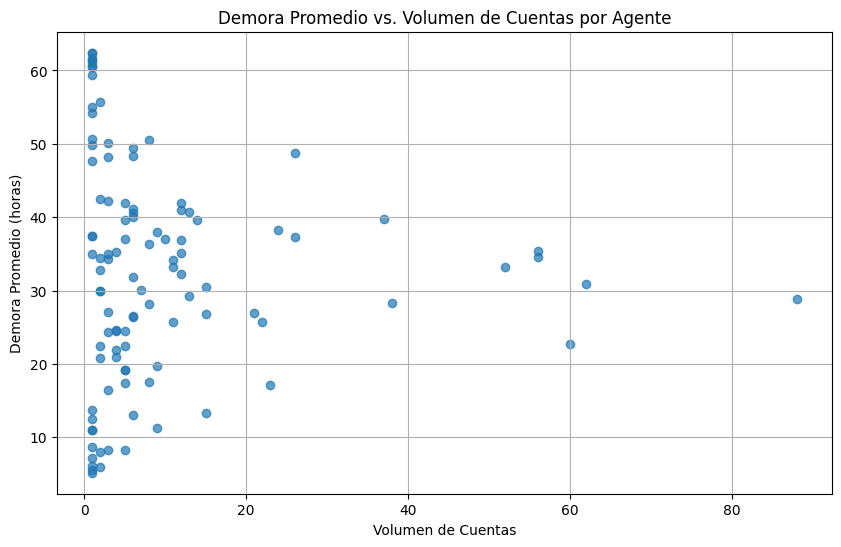

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(summary['volumen'], summary['mean_demora'], alpha=0.7)
plt.title('Demora Promedio vs. Volumen de Cuentas por Agente')
plt.xlabel('Volumen de Cuentas')
plt.ylabel('Demora Promedio (horas)')
plt.grid()
plt.show()


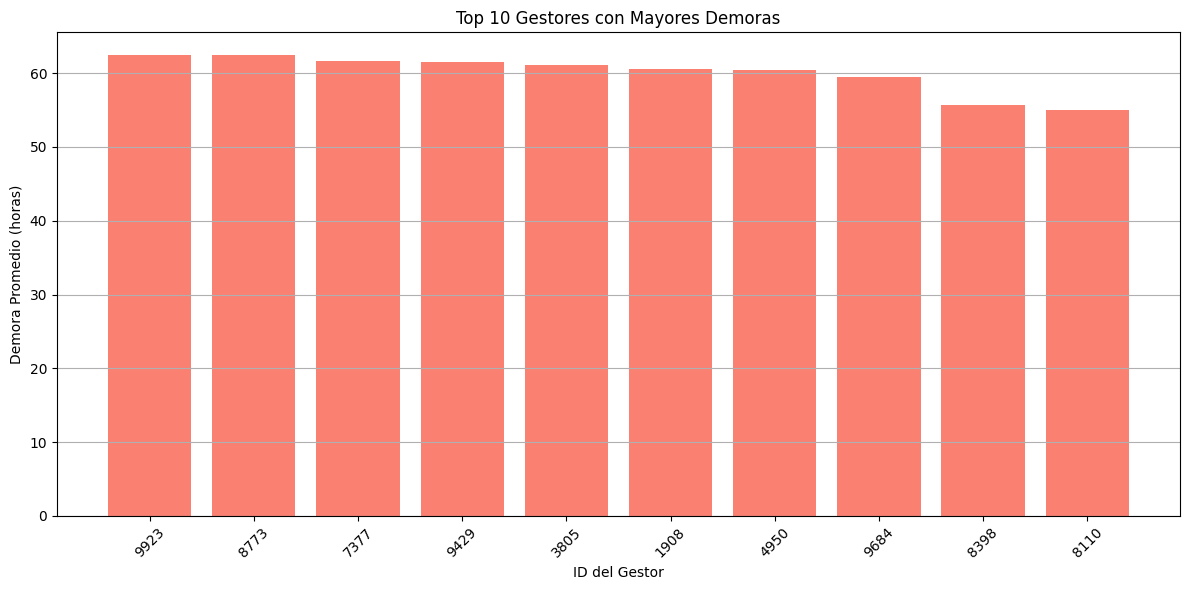

In [ ]:
# Obtener los 10 gestores con mayores demoras
gestores_mayores_demoras = demoras_por_gestor.head(10)

# Crear el gráfico de barras para los 10 gestores con mayores demoras
plt.figure(figsize=(12, 6))
plt.bar(gestores_mayores_demoras.index.astype(str), gestores_mayores_demoras.values, color='salmon')
plt.title('Top 10 Gestores con Mayores Demoras')
plt.xlabel('ID del Gestor')
plt.ylabel('Demora Promedio (horas)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
##Obtener la Cantidad de Cuentas Asignadas por Gestor: Puedes filtrar el DataFrame para contar cuántas cuentas están asignadas a cada uno de estos gestores.
# Lista de gestores con alta demora
gestores_alta_demora = [9078, 9923, 8773, 7377, 9429, 9451, 6774, 3805, 7486, 1908]

# Filtrar las cuentas asignadas a estos gestores
cuentas_gestores_alta_demora = df[df['id_agente'].isin(gestores_alta_demora)]

# Contar la cantidad de cuentas asignadas por gestor
cuentas_por_gestor = cuentas_gestores_alta_demora['id_agente'].value_counts()
print(cuentas_por_gestor)


id_agente
6774    15
7486     8
9078     5
9451     3
1908     1
3805     1
9429     1
7377     1
8773     1
9923     1
Name: count, dtype: int64


In [ ]:
##Análisis de Resultados
#Distribución de Cuentas:

#Gestor 6774 tiene la mayor cantidad de cuentas (15). Esto puede indicar que está manejando una carga de trabajo significativa, lo que podría contribuir a sus altos tiempos de demora.
#Gestores como 7486 y 9078 también tienen un número razonable de cuentas (8 y 5 respectivamente), lo que sugiere que pueden estar en una situación similar.
#Los demás gestores (9451, 1908, 3805, 9429, 7377, 8773 y 9923) tienen una o muy pocas cuentas asignadas, lo que puede indicar que su carga de trabajo es menor.

#Estrategias Potenciales:

#Reasignación de Cuentas: Considerar la posibilidad de redistribuir algunas cuentas de los gestores más ocupados a aquellos con menos cuentas asignadas.
#Capacitación y Soporte: Proporcionar capacitación adicional o apoyo a los gestores con mayor carga de trabajo para ayudarlos a gestionar mejor su tiempo y recursos.
#Monitoreo y Evaluación: Establecer un sistema de monitoreo para evaluar la carga de trabajo y el desempeño de cada gestor, lo que permitirá identificar rápidamente a aquellos que puedan necesitar apoyo.

In [ ]:
## Obtener la Distribución por Estado: También es importante ver en qué estados están asignadas las cuentas de cada gestor. Puedes hacerlo de la siguiente manera:
# Agrupar por estado y gestor
estados_por_gestor = cuentas_gestores_alta_demora.groupby(['id_agente', 'id_estado']).size().unstack(fill_value=0)
print(estados_por_gestor)


id_estado  10  11  14  19  21  25  26  30
id_agente                                
1908        0   0   0   0   0   0   0   1
3805        0   0   0   0   0   1   0   0
6774        0   0   0   0  15   0   0   0
7377        0   0   0   0   1   0   0   0
7486        0   0   8   0   0   0   0   0
8773        0   0   0   1   0   0   0   0
9078        0   5   0   0   0   0   0   0
9429        0   0   0   1   0   0   0   0
9451        0   0   0   0   0   0   3   0
9923        1   0   0   0   0   0   0   0


In [ ]:
##2. Posibles Causas de las Demoras:
#(a) Falta de visitas: Es posible que los gestores con mayores demoras no estén realizando suficientes visitas, lo que podría estar retrasando la finalización de las cuentas. Podemos revisar si hay una correlación entre el número de visitas realizadas y los tiempos de demora.
# Verificar la cantidad de visitas por gestor con cuentas demoradas
visitas_por_gestor = cuentas_largas_demoras.groupby('id_agente')['id_visita'].count().sort_values(ascending=False)
print("Cantidad de visitas por gestor con cuentas demoradas:")
print(visitas_por_gestor.head(10))  # Los 10 gestores con más o menos visitas


Cantidad de visitas por gestor con cuentas demoradas:
id_agente
3020    41
7990    34
4451    32
1379    31
4963    28
7635    23
5038    21
3755    19
1616    16
6387    15
Name: id_visita, dtype: int64


In [ ]:
#Interpretación:
#Gestores con muchas visitas y aún así demoras: Por ejemplo, el gestor con ID 3020 tiene 41 visitas, lo que sugiere que no es la falta de visitas lo que está causando el retraso. Aquí deberíamos explorar otras posibles causas, como problemas regionales, la complejidad de las cuentas o la falta de recursos.

#Gestores con pocas visitas y altas demoras: Los gestores que tienen menos visitas asignadas, como 5038 o 3755, podrían estar enfrentando dificultades operativas, como logística de las visitas, o quizás no están siendo asignados suficientes casos para optimizar su flujo de trabajo.

#Hipótesis derivadas:
#Falta de visitas como posible causa de demora: Gestores con pocas visitas podrían estar teniendo problemas para completar cuentas en tiempo, lo que sugiere que incrementar el número de visitas podría mejorar su eficiencia.

#Volumen de cuentas asignadas: Es importante investigar si los gestores con más demoras están recibiendo un volumen muy alto de cuentas que no pueden gestionar en el tiempo estipulado.

In [ ]:
# Verificar las demoras promedio por estado
demoras_por_estado = cuentas_largas_demoras.groupby('id_estado')['demora'].mean().sort_values(ascending=False)
print("Demoras promedio por estado:")
print(demoras_por_estado.head(10))  # Ver los estados con mayores demoras


Demoras promedio por estado:
id_estado
26    61.305833
28    59.367986
16    58.921528
2     55.952693
21    55.119379
24    54.246889
19    53.878014
22    53.870321
11    53.537222
31    52.728194
Name: demora, dtype: float64


In [ ]:
#Interpretación:
#Estados con mayores demoras: Los estados con mayores demoras, como los que tienen IDs 26, 28, y 16, presentan tiempos de demora superiores a 58 horas, lo que sugiere que en estas regiones podría haber factores específicos que dificulten la finalización de las cuentas, como:
#Distancias geográficas: Si los gestores tienen que cubrir grandes áreas, puede ser difícil completar las visitas a tiempo.
#Condiciones locales: Problemas de infraestructura, tráfico o logística pueden estar afectando el desempeño.
#Estados con demoras moderadas: Los estados como 11 y 31, que tienen demoras cercanas a 52 horas, podrían estar más alineados con el promedio general, aunque siguen siendo más lentos en comparación con otros estados.
#Hipótesis a validar:
#Problemas regionales: Los estados con mayores demoras podrían tener condiciones externas que impactan la eficiencia, como la geografía o las políticas locales.

#Distribución inadecuada de recursos: Es posible que los gestores en estos estados estén sobrecargados o que no se estén asignando suficientes recursos para completar las cuentas en tiempo.

In [ ]:
#Próximos pasos:
#Comparar demoras con el volumen de cuentas por estado: Vamos a ver si estos estados con mayores demoras también tienen un alto volumen de cuentas, lo que podría ser un factor contribuyente.

In [ ]:
# Volumen de cuentas por estado
volumen_cuentas_por_estado = df.groupby('id_estado')['id_cuenta'].count().sort_values(ascending=False)
print("Volumen de cuentas asignadas por estado:")
print(volumen_cuentas_por_estado.head(10))  # Estados con más cuentas asignadas


Volumen de cuentas asignadas por estado:
id_estado
9     288
14    164
15    150
19     74
22     70
21     37
2      36
11     29
23     23
30     23
Name: id_cuenta, dtype: int64


In [ ]:
##Análisis del Volumen de Cuentas por Estado
#Aquí tienes el análisis de los volúmenes de cuentas asignadas por estado, que se puede correlacionar con las demoras observadas previamente:

#Volumen de Cuentas Asignadas por Estado:
#Estado ID 9: 288 cuentas asignadas
#Estado ID 14: 164 cuentas asignadas
#Estado ID 15: 150 cuentas asignadas
#Estado ID 19: 74 cuentas asignadas
#Estado ID 22: 70 cuentas asignadas
#Estado ID 21: 37 cuentas asignadas
#Estado ID 2: 36 cuentas asignadas
#Estado ID 11: 29 cuentas asignadas
#Estado ID 23: 23 cuentas asignadas
#Estado ID 30: 23 cuentas asignadas
#Correlación entre Demoras y Volumen de Cuentas
#Altas Demoras vs. Alto Volumen:

#Si observamos que un estado con un alto volumen de cuentas, como el Estado ID 9, tiene también demoras significativas, esto puede indicar que los gestores están sobrecargados.
#Es crucial determinar si los gestores en estos estados están logrando atender adecuadamente el volumen de cuentas asignadas. Por ejemplo, si el Estado ID 9 tiene una demora promedio de más de 60 horas, podría significar que hay una falta de recursos o personal.
#Estados con Bajos Volúmenes y Altas Demoras:

#Si un estado con un bajo volumen de cuentas, como el Estado ID 11 o Estado ID 30, muestra demoras superiores a lo normal, podríamos investigar si existen problemas particulares en esas regiones que estén afectando la atención.
#Hipótesis a Validar:
#Sobrecarga de Trabajo: Los gestores en los estados con alto volumen de cuentas y altas demoras podrían estar lidiando con una carga de trabajo demasiado alta.
#Condiciones Locales: En estados con un bajo volumen de cuentas y altas demoras, puede que existan condiciones externas que impacten negativamente el rendimiento.
#Siguiente Paso:
#Te recomendaría hacer un análisis comparativo entre las demoras promedio y el volumen de cuentas por estado. Esto podría hacerse de la siguiente manera:

In [ ]:
# Crear un dataframe con demoras promedio y volumen de cuentas
demoras_por_estado = df.groupby('id_estado')['demora'].mean()
volumen_cuentas_por_estado = df.groupby('id_estado')['id_cuenta'].count()

# Combinar en un solo DataFrame
estado_analisis = pd.DataFrame({
    'demora_promedio': demoras_por_estado,
    'volumen_cuentas': volumen_cuentas_por_estado
}).sort_values(by='demora_promedio', ascending=False)

print(estado_analisis)


           demora_promedio  volumen_cuentas
id_estado                                  
18               50.116111                3
29               47.631667                1
16               42.196019                3
2                41.050100               36
8                39.952753               11
12               37.468056                1
24               37.009917               10
22               36.825913               70
1                36.558889               14
11               36.265910               29
19               34.959899               74
28               33.654861                8
9                33.179767              288
21               32.342072               37
15               31.381656              150
31               29.418359               11
14               27.889329              164
23               27.321727               23
30               25.789734               23
5                24.250309                9
10               23.547659      

In [ ]:
##Observaciones
#Altas Demoras con Pocos Cuentas:

#Los estados 18, 29 y 16 presentan demoras promedio altas (más de 42 horas) pero tienen un volumen de cuentas muy bajo (entre 1 y 3 cuentas). Esto puede indicar problemas específicos en estos estados que necesitan atención, a pesar de que el volumen de cuentas es bajo.
#Altas Demoras con Alto Volumen:

#El Estado ID 9 tiene el volumen más alto de cuentas (288) pero una demora promedio relativamente baja (33.18 horas). Esto sugiere que, a pesar de la gran cantidad de cuentas, el rendimiento es aceptable, aunque aún se podría mejorar.
#Problemas Potenciales:

#El Estado ID 2 tiene un volumen significativo (36 cuentas) y una demora promedio de 41.05 horas. Este estado podría estar experimentando dificultades que merecen ser investigadas para optimizar los tiempos de respuesta.
#El Estado ID 19, aunque tiene un volumen considerable (74 cuentas), presenta una demora de 34.96 horas, lo que podría indicar que se debe revisar la eficiencia en la atención.

       fec_activacion id_externo_cliente  id_cuenta  id_cliente  \
0 2024-04-26 21:58:43              61858          1           6   
1 2024-03-11 16:25:30              45091          1           6   
2 2023-02-24 12:07:05              33846          1           6   
3 2024-01-17 15:49:23              53345          1           6   
4 2023-10-17 12:00:56              54816          1           6   

   id_acreditado  id_acreditado_cuenta_domicilio  id_estado  id_municipio  \
0           4809                               1         21          1591   
1           4338                               3          2            15   
2           3917                               1         11           331   
3           4534                               1         14           574   
4           4410                               1         14           655   

       fec_asignacion        fec_apartado  id_agente_apartado  id_agente  \
0 2024-04-29 22:20:28 2024-04-29 22:31:45                6